<a href="https://colab.research.google.com/github/mcarr-emory/Math210Labs/blob/master/Lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Name: 

### Student ID: 

# Math 210 Lab 2

Goals:
 
* Use functions to approximate integrals.
* Use graphs to put bounds on the values of a function (especially a derviative).
* Understand the relationship between an error bound and the actual error, and how the shape of the graph affects this discrepancy.


In this lab we're going to approximate integrals and study the error.  First we'll need to import libraries.

In [0]:
import numpy as np
from numpy.polynomial import polynomial as poly 
import matplotlib.pyplot as plt
import matplotlib.patches as patches  #this will draw rectangles for us



Now you'll need a function $y=f(x)$.  Fill in your name in the code below (remember the ''), run it, and $f(x)$ will appear in the output box.

In [2]:
yourName='Mike'  #your name goes between the ' marks.

def alphanum(name):
  if 64<ord(name[0])<91:
    return ord(name[0])-64
  elif 96<ord(name[0])<123:
    return ord(name[0])-96
  else:
    return 0
  
if alphanum(yourName)==0:
  print("Your name doesn't seem to start with a letter. Try again.")
  students=[]
elif 1<=alphanum(yourName)<=3:
  c=[-6,14,-6,1]
  fString='x^3-6x^2+14x-6'
elif 4<=alphanum(yourName)<=6:
  c=[20,-4,6,-1]
  fString='-x^3+6x^2-4x+20'
elif 7<=alphanum(yourName)<=10:
  c=[-20,40,-12,1]
  fString='x^3-12x^2+40x-20'
elif 11<=alphanum(yourName)<=12:
  c=[300,-264,96,-16,1]
  fString='x^4-16x^3+96x^2-264x+300'
elif 13<=alphanum(yourName)<=17:
  c=[130,-57,12,-1]
  fString='-x^3+12x^2-57x+130'
elif 18<=alphanum(yourName)<=21:  
  c=[4,6,-3,1]
  fString='x^3-3x^2+6x+4'
elif 22<=alphanum(yourName)<=26:  
  c=[90,-108,54,-12,1]
  fString='x^4-12x^3+54x^2-108x+90'
  
def f(x):
  return poly.polyval(x,c)
print(f'Your polynomial is {fString}.')
print(f'Python has stored it as a list of coefficents c={c}.')


Your polynomial is -x^3+12x^2-57x+130.
Python has stored it as a list of coefficents c=[130, -57, 12, -1].


Storing your polynomial as a string of coefficents allows us to use the powerful `numpy.polynomial` library on it. This will give us automatic computation of derivatives and integrals.  To evaluate a polynomial stored this way we write.

In [0]:
#evaulate the polynomial with coefficents c at x=8
poly.polyval(8,c)

### Approximating an Integral

Here is a function that will approximate an integral.  Run the code to define the function.

In [0]:
#c is a list of coefficients of a polynomial.
#a and b are bounds.  n is number of subintervals.
#points can take 'left' 'right' or 'mid'
#draw can take True or False
#error can take True or False

def intApprox(c,a,b,n, draw=False, points='left', error=False):  
  deltax=(b-a)/n
  endPoints=[]
  if points=='mid':
    shift=0.5*deltax
    apxName='M'
  elif points=='right':
    shift=deltax
    apxName='R'
  else:
    shift=0
    apxName='L'    
  if draw:
    plt.figure()
    x=np.arange(a-(b-a)/10, b+(b-a)/10, (b-a)/100)
    axis=plt.gca()
    plt.plot(x,poly.polyval(x,c))
  for i in range(n):
    endPoints.append(a+i*deltax)
  approximation=0
  for xi in endPoints:
    approximation=approximation+poly.polyval(xi+shift,c)*deltax
    if draw:
      rect=patches.Rectangle((xi,0), deltax,poly.polyval(xi+shift,c), fill=None)
      axis.add_patch(rect)
  if draw:
    title='$'+apxName+'_{'+str(n)+'}$ Approximation for c='+str(c)
    axis.set_title(title)
    plt.show()  
  if error: #these two lines compute the error using the FTC
    trueValue=poly.polyval(b,poly.polyint(c))-poly.polyval(a,poly.polyint(c))
    return({'approximation' : approximation, 'error':approximation-trueValue})
  else:
    return(approximation)

Now we are ready to run it.  The coefficients of your function are still saved under the name `c`. The command below computes the $L_{10}$ approximation of $\int_1^6 f(x)~dx$.

In [0]:
intApprox(c,1,6,10)


I've built some extra options into the code.  The code below includes these options.  Feel free to play with these.  
1. Can you get a midpoint approximation?  How does the error $E_M$ comapre to $E_L$?
2. What happens to the error if you increase to 100 rectangles.? 1000?


---



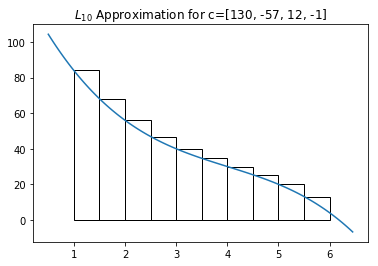

{'approximation': 209.0625, 'error': 20.3125}

In [4]:
intApprox(c,1,6,10, points='left', error=True, draw=True)

### Error Bounds

We have learned formulas for the error bound of $L_n$ and $M_n$. We would like to know how our actual error compares to this bound, but first we need to compute the bound.  Recall that the missing piece is a bound on $S$ on $|f'(x)|$ and a bound $K$ on $|f''(x)|$.

This code will graph the derivative of your polynomial. 

[-57.  24.  -3.]


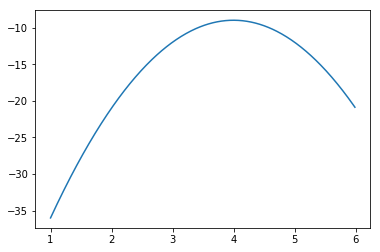

In [6]:
#define d as the derivative of c
d=poly.polyder(c) 

#set up a plot
plt.figure()

#choose x values from 1 to 6
x=np.arange(1, 6, 1/100)

#plot the function. poly.polyval evaluates the polynomial at x
plt.plot(x,poly.polyval(x,d))

#print the coefficients of d
print(d)

#show the graph
plt.show()


If you can see where the maximum value of $|f'(x)|$ lies on $[a,b]$, you can evaluate the derivative using the code `poly.polyval(x,d)`.

In [0]:
#Evaluate the derivative of f at x=12
poly.polyval(12,d)

# Questions
Write answers to these questions using code and text blocks.  When you are satisfied, download and submit an .ipynb file to Canvas.

## Q1

Write a code block that will graph the second derivative of your function (hint: copy/paste exists).  Use that graph and the evaluation function to get a reasonable bound for $|f''(x)|$.

## Q2

State your bounds on $|f'(x)|$ and $|f''(x)|$.  Compute the theoretical bounds for $E_L$ and $E_M$ by inputting the relevent calculations into code block and running them. (You can use Python as a simple calculator, for example $\frac{12(7^2)}{5-8}$ can be computed by inputting `(12*7*7)/(5-8)`).

Slides are here http://www.math.emory.edu/~mpcarr/math210/index.html if you need to look up formulas.

## Q3

How does your actual error compare to the theoretical error bound?  Compare with other students and determine what geometric properties of a graph will cause the actual errors $E_L$ and $E_M$ to be close to the theoretical bounds and what properties will cause it to be much smaller.  You answer should include a few paragraphs of observations with relevent pictures.  

You can easily create pictures of other people's functions by directly putting them into the `intApprox` function as shown below.

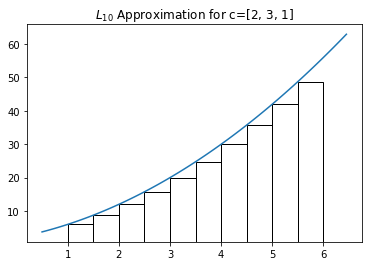

{'approximation': 121.875, 'error': -12.291666666666657}

In [5]:
#The L_10 approximation of the integral of x^2+3x+2 from 1 to 6
intApprox([2,3,1],1,6,10, draw=True, error=True, points='left')